In [ ]:
"""
Created on Mon May 16 19:00:32 2022
@author: Ajit Johnson Nirmal
SCIMAP tutorial May 2022
"""

In [1]:
# load packages
import scimap as sm
import scanpy as sc
import pandas as pd

In [2]:
common_path = "/Users/aj/Dropbox (Partners HealthCare)/conferences/scimap_tutorial/may_2022_tutorial/"
#common_path = "C:/Users/ajn16/Dropbox (Partners HealthCare)/conferences/scimap_tutorial/may_2022_tutorial/"

In [3]:
# load data
adata = sm.pp.mcmicro_to_scimap (image_path= str(common_path) + 'exemplar_001/quantification/unmicst-exemplar-001_cell.csv')

Loading unmicst-exemplar-001_cell.csv


In [4]:
adata

AnnData object with n_obs × n_vars = 11170 × 9
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'imageid'
    uns: 'all_markers'

In [5]:
# Markers in dataset
adata.var.index

Index(['ELANE', 'CD57', 'CD45', 'CD11B', 'SMA', 'CD16', 'ECAD', 'FOXP3',
       'NCAM'],
      dtype='object')

### manually gate the data

In [7]:
# manually gate the data
image_path = str(common_path) + 'exemplar_001/registration/exemplar-001.ome.tif'

In [8]:
marker_of_interest = 'ECAD'

In [9]:
sm.pl.gate_finder (image_path, adata, marker_of_interest, 
                   from_gate = 5, to_gate = 9, increment = 0.1, 
                   point_size=10)

### rescale the data based on the manual gates

In [10]:
manual_gate = pd.read_csv(str(common_path) + 'manual_gates.csv')

In [11]:
manual_gate

,markers,gate
0,ELANE,7.9
1,CD57,8.1
2,CD45,6.3
3,CD11B,7.2
4,SMA,7.6
5,CD16,6.8
6,ECAD,7.4
7,FOXP3,7.0
8,NCAM,7.2


In [12]:
# rescale the data
adata = sm.pp.rescale (adata, gate=manual_gate)

Scaling Image ['unmicst-exemplar-001_cell']
Scaling ELANE
Scaling CD57
Scaling CD45
Scaling CD11B
Scaling SMA
Scaling CD16
Scaling ECAD
Scaling FOXP3
Scaling NCAM


### Phenotyping cells

In [13]:
# load the phenotyping workflow
phenotype = pd.read_csv(str(common_path) + 'phenotype_workflow.csv')

In [14]:
phenotype.style.format(na_rep='')

,Unnamed: 0,Unnamed: 1,CD57,CD45,CD11B,SMA,CD16,ECAD,FOXP3
0,all,Other Immune cells,anypos,anypos,anypos,,anypos,,anypos
1,all,ASMA+ cells,,,,pos,,,
2,all,Tumor,,,,,,pos,
3,Other Immune cells,Myeloid,,,pos,,,,
4,Other Immune cells,NK cells,pos,,,,,,
5,Other Immune cells,Neutrophils,,,,,pos,,
6,Other Immune cells,Treg,,,,,,,pos


In [15]:
# Run the phenotyping algorithm
adata = sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype") 

Phenotyping Other Immune cells
Phenotyping ASMA+ cells
Phenotyping Tumor
-- Subsetting Other Immune cells
Phenotyping Myeloid
Phenotyping NK cells
Phenotyping Neutrophils
Phenotyping Treg
Consolidating the phenotypes across all groups


In [16]:
# Check the number of phenotyped cells
adata.obs['phenotype'].value_counts()

Other Immune cells    3707
Tumor                 2499
Unknown               1782
Myeloid               1140
Neutrophils            895
ASMA+ cells            457
Treg                   364
NK cells               326
Name: phenotype, dtype: int64

In [17]:
# Visualize cell types
sm.pl.image_viewer (image_path, adata, overlay = 'phenotype', point_color='white', point_size=10)

In [18]:
# add seg mask
seg_mask_path = str(common_path) + 'exemplar_001/qc/s3seg/unmicst-exemplar-001/cellOutlines.ome.tif'
sm.pl.image_viewer (image_path, adata, 
                    seg_mask = seg_mask_path,
                    overlay = 'phenotype', 
                    point_color='white', 
                    point_size=10)

... storing 'imageid' as categorical
... storing 'phenotype' as categorical


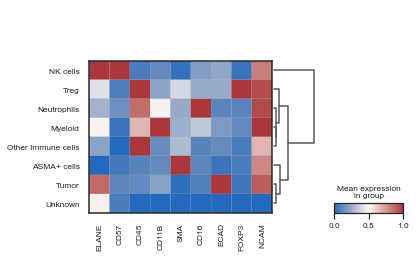

In [19]:
# Visualize heatmap of cell types
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='phenotype', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

### Voronoi Plots

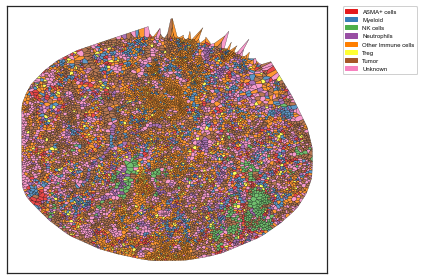

In [20]:
sm.pl.voronoi(adata, color_by='phenotype', 
                 voronoi_edge_color = 'black',
                 voronoi_line_width = 0.3, 
                 voronoi_alpha = 0.8, 
                 size_max=5000,
                 overlay_points=None, 
                 plot_legend=True, 
                 legend_size=6)

In [21]:
# Map user defined colors
colors = {'ASMA+ cells': '#8AC926', 
          'Myeloid': "#E9D8A6", 
          'NK cells':  "#0A9396",
          'Neutrophils': "#CA6702", 
          'Other Immune cells':'#001219',
          'Treg': "#005F73", 
          'Tumor':  "#9B2226",
          'Unknown': '#BCB8B1'
    }

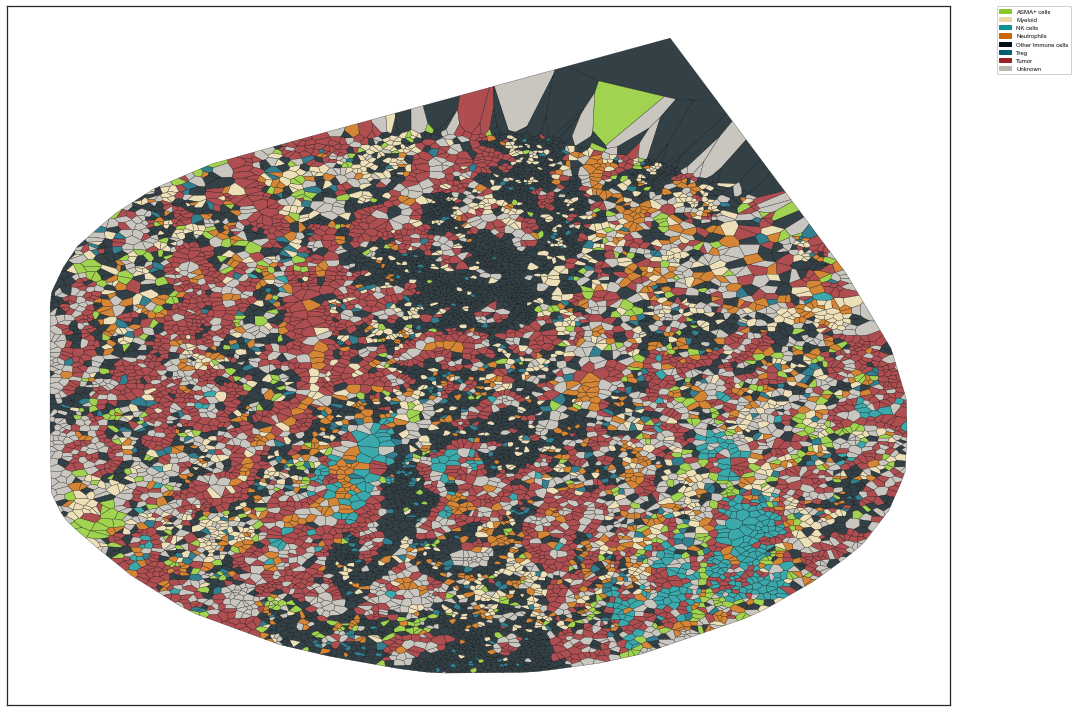

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
sm.pl.voronoi(adata, color_by='phenotype', 
                  colors = colors,
                 voronoi_edge_color = 'black',
                 voronoi_line_width = 0.3, 
                 voronoi_alpha = 0.8, 
                 #size_max=5000,
                 overlay_points=None, 
                 plot_legend=True, 
                 legend_size=6)

### Adding ROI to images

In [24]:
adata = sm.pl.addROI_image(image_path, adata, 
                             subset=None, 
                             imageid='imageid', 
                             overlay=None, overlay_category=None,
                             markers=None, 
                             channel_names='default', 
                             x_coordinate='X_centroid', y_coordinate='Y_centroid', 
                             seg_mask=None, 
                             overwrite=True, 
                             label='ROI')


        Opening Napari;
        Add shape layers (on left) to draw ROI's. 
        Rename the shape layer to give a name to your ROI
        Multiple shape layers are supported
        ROI's should not overlap
        Close Napari to save ROI's.
        
Identifying cells within selected ROI's


/opt/anaconda3/envs/scimap/lib/python3.9/site-packages/scimap/plotting/_addROI_image.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inside['ROI_internal'] = all_rois[all_rois['id'] == roi_id]['ROI'][roi_id]
/opt/anaconda3/envs/scimap/lib/python3.9/site-packages/scimap/plotting/_addROI_image.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inside['ROI_internal'] = all_rois[all_rois['id'] == roi_id]['ROI'][roi_id]
/opt/anaconda3/envs/scimap/lib/python3.9/site-packages/scimap/plotting/_addROI_image

In [25]:
# check ROI cell count
adata.obs['ROI'].value_counts()

Other        8075
CD57-high    2115
CD57-low      980
Name: ROI, dtype: int64

In [26]:
# Add ROI individually
adata = sm.pl.addROI_image(image_path, adata, 
                     overwrite=True, 
                     label='ROI_individual')


        Opening Napari;
        Add shape layers (on left) to draw ROI's. 
        Rename the shape layer to give a name to your ROI
        Multiple shape layers are supported
        ROI's should not overlap
        Close Napari to save ROI's.
        
Identifying cells within selected ROI's


/opt/anaconda3/envs/scimap/lib/python3.9/site-packages/scimap/plotting/_addROI_image.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inside['ROI_internal'] = all_rois[all_rois['id'] == roi_id]['ROI'][roi_id]
/opt/anaconda3/envs/scimap/lib/python3.9/site-packages/scimap/plotting/_addROI_image.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inside['ROI_internal'] = all_rois[all_rois['id'] == roi_id]['ROI'][roi_id]
/opt/anaconda3/envs/scimap/lib/python3.9/site-packages/scimap/plotting/_addROI_image

In [27]:
# check number of cells
adata.obs['ROI_individual'].value_counts()

Other          8025
CD57-high-2     969
CD57-low-1      710
CD57-high-1     427
CD57-low-3      393
CD57-low-2      293
CD57-high-3     188
artifacts       165
Name: ROI_individual, dtype: int64

In [30]:
# Scatter plot to show the differnt ROI's
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'
def plotly (adata,phenotype,image_id=None,x='X_centroid',y='Y_centroid',size=2, **kwargs):
    if image_id is not None:
        adata = adata[adata.obs['imageid'] == image_id]    
    data = pd.DataFrame({'x':adata.obs[x], 'y':adata.obs[y],'col': adata.obs[phenotype]})
    data = data.sort_values(by=['col'])
    fig = px.scatter(data, x="x", y="y", color="col", **kwargs)
    fig.update_traces(marker=dict(size=size),selector=dict(mode='markers'),hoverlabel = dict(namelength = -1))
    fig.update_yaxes(autorange="reversed", tickformat='g')
    fig.update_xaxes(tickformat='g')
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
    return fig

plotly (adata,phenotype='ROI_individual',image_id=None,x='X_centroid',y='Y_centroid',size=10)

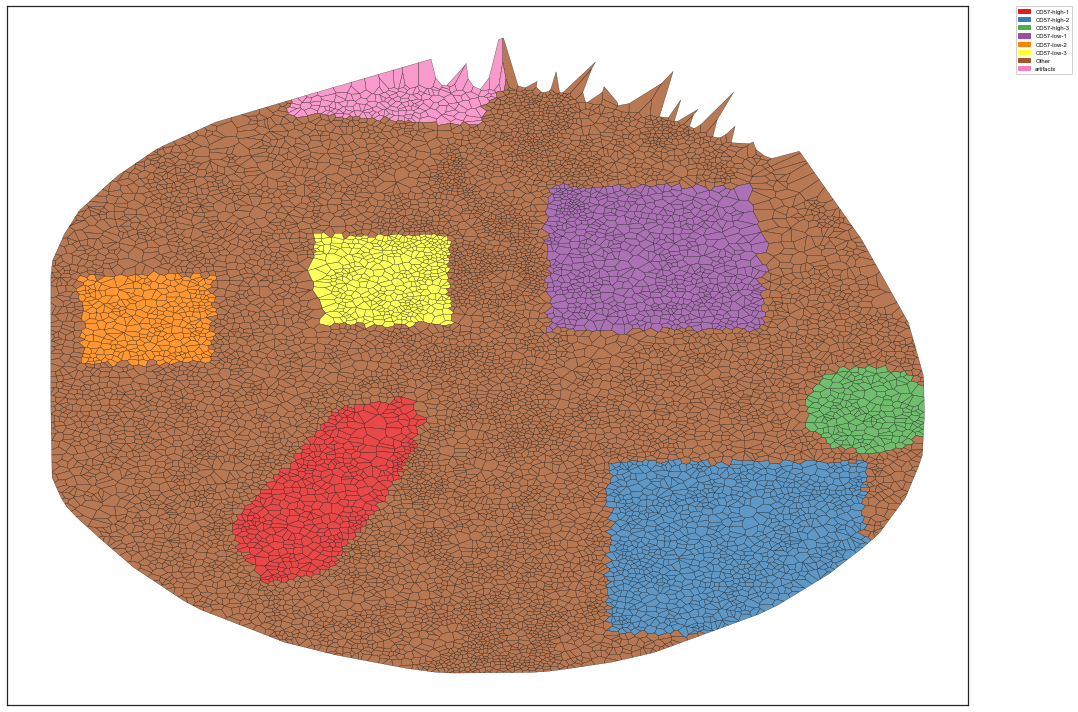

In [31]:
# voronoi plot
sm.pl.voronoi(adata, color_by='ROI_individual', 
                 voronoi_edge_color = 'black',
                 voronoi_line_width = 0.3, 
                 voronoi_alpha = 0.8, 
                 size_max=5000,
                 overlay_points=None, 
                 plot_legend=True, 
                 legend_size=6)

In [32]:
bdata = adata[adata.obs['ROI_individual'] != 'artifacts']

In [33]:
plotly (bdata,phenotype='ROI_individual',image_id=None,x='X_centroid',y='Y_centroid',size=10)

In [34]:
# save adata
adata.write(str(common_path) + 'may2022_tutorial.h5ad')

... storing 'ROI' as categorical
... storing 'ROI_individual' as categorical
